In [29]:

import glob
import re

BASE_FOLDER = "./raw"
cities = [re.search(r".*/([A-Z]+)", s).group(1) for s in glob.glob(f"{BASE_FOLDER}/*/")]
print(f'Found data for {len(cities)} cities: {", ".join(cities)}')

Found data for 4 cities: ANTWERP, BARCELONA, BANGKOK, MOSCOW


In [126]:
import pandas as pd
city = "BANGKOK"

df_in = pd.read_csv(f"{BASE_FOLDER}/{city}/hourly_processed_means_in_covid.csv")
df_pre = pd.read_csv(f"{BASE_FOLDER}/{city}/hourly_processed_means_pre.csv")
df_in

,Unnamed: 0,date,weekday,hour,region_id,region_mean_volume
0,0,2020-04-01,2,0,0,7.818866
1,1,2020-04-01,2,0,8,6.481963
2,2,2020-04-01,2,0,15,7.028706
3,3,2020-04-01,2,0,23,5.189595
4,4,2020-04-01,2,0,31,8.756695
...,...,...,...,...,...,...
15835,7915,2020-04-20,0,23,216,6.575724
15836,7916,2020-04-20,0,23,224,6.102634
15837,7917,2020-04-20,0,23,232,5.836652
15838,7918,2020-04-20,0,23,240,6.791658


In [64]:
df_pre

,Unnamed: 0,date,weekday,hour,region_id,region_mean_volume
0,0,2019-04-01,0,0,0,7.818866
1,1,2019-04-01,0,0,8,6.481963
2,2,2019-04-01,0,0,15,7.028706
3,3,2019-04-01,0,0,23,5.189595
4,4,2019-04-01,0,0,31,8.756695
...,...,...,...,...,...,...
15835,7915,2019-04-20,5,23,216,6.575724
15836,7916,2019-04-20,5,23,224,6.102634
15837,7917,2019-04-20,5,23,232,5.836652
15838,7918,2019-04-20,5,23,240,6.791658


In [65]:
id_in = df_in.groupby(["region_id"]).mean()
id_pre = df_pre.groupby(["region_id"]).mean()

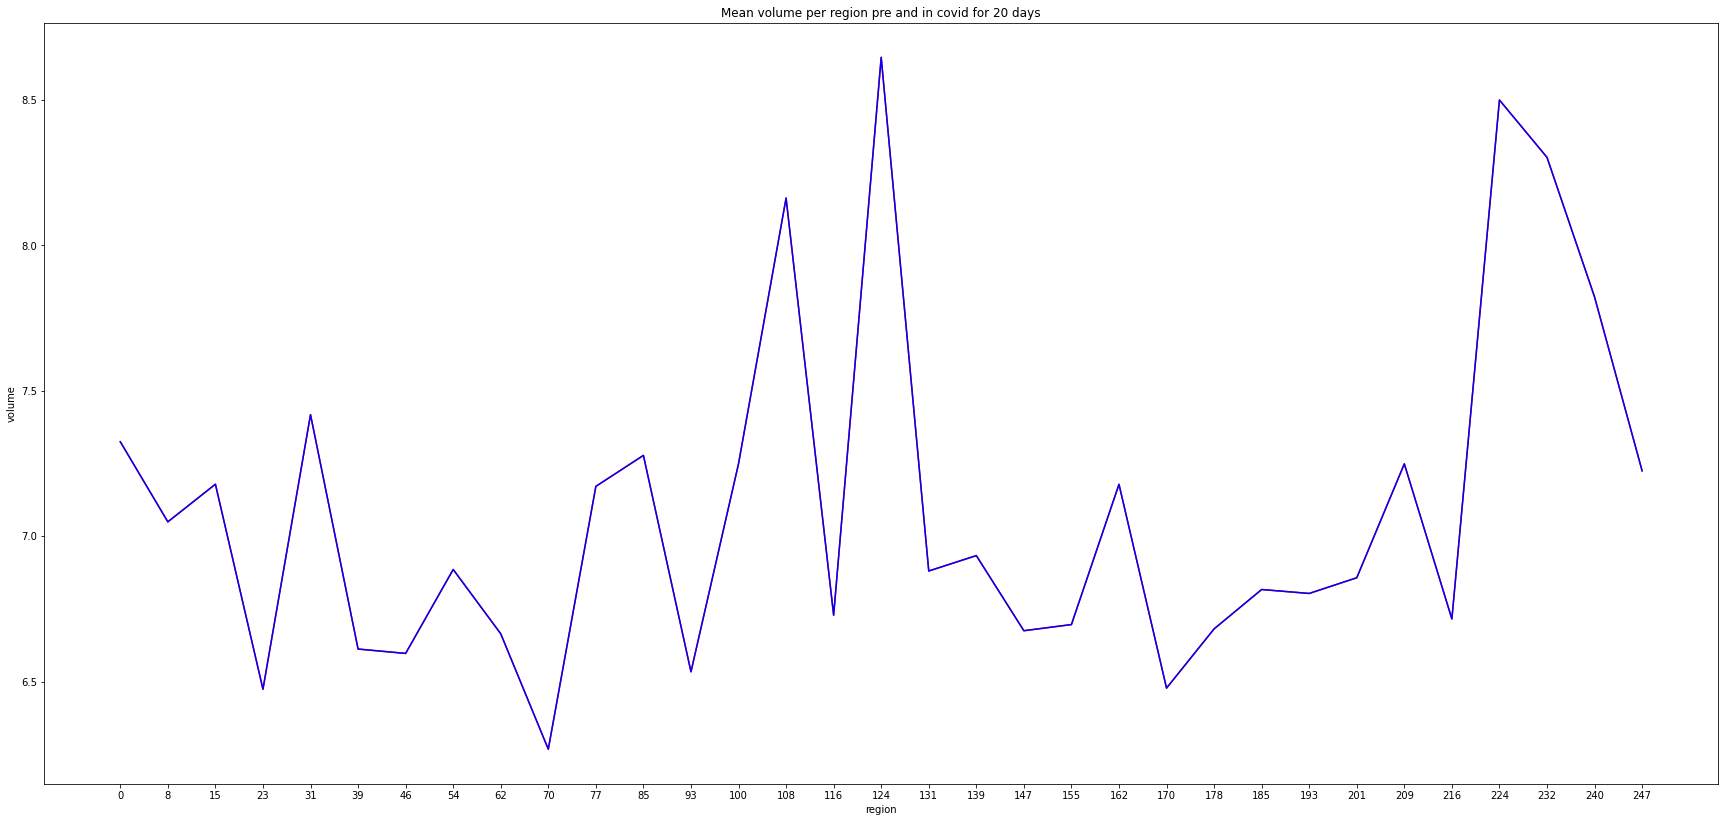

In [144]:
import numpy as np
import matplotlib.pyplot as plt

x = id_in.index
y = id_in.iloc[:,3].values
y2 = id_pre.iloc[:,3].values

plt.title("Mean volume per region pre and in covid for 20 days")
plt.xlabel("region")
plt.ylabel("volume")
plt.plot(y,"r")
plt.plot(y2,"b")
plt.xticks(np.arange(33),x)
plt.rcParams["figure.figsize"] = (30,14)
plt.show()

In [25]:
dates = df.date.unique()
for d in dates:
    print(d)

2020-04-01
2020-04-02
2020-04-03
2020-04-04
2020-04-05
2020-04-06
2020-04-07
2020-04-08
2020-04-09
2020-04-10
2020-04-11
2020-04-12
2020-04-13
2020-04-14
2020-04-15
2020-04-16
2020-04-17
2020-04-18
2020-04-19
2020-04-20


In [107]:
region_in = df_in.groupby(["region_id","date","hour"]).mean()
region_pre = df_pre.groupby(["region_id","date","hour"]).mean()

In [136]:
filter1 = df_in.date == dates[0]
filter2 = df_in.region_id == 0
di= df_in.copy() 
di.where(filter1&filter2,inplace=True)
di = di.dropna()
di

,Unnamed: 0,date,weekday,hour,region_id,region_mean_volume
0,0.0,2020-04-01,2.0,0.0,0.0,7.818866
33,33.0,2020-04-01,2.0,1.0,0.0,7.627964
66,66.0,2020-04-01,2.0,2.0,0.0,6.816566
99,99.0,2020-04-01,2.0,3.0,0.0,7.198134
132,132.0,2020-04-01,2.0,4.0,0.0,7.302145
165,165.0,2020-04-01,2.0,5.0,0.0,6.880544
198,198.0,2020-04-01,2.0,6.0,0.0,6.883811
231,231.0,2020-04-01,2.0,7.0,0.0,7.138633
264,264.0,2020-04-01,2.0,8.0,0.0,7.277784
297,297.0,2020-04-01,2.0,9.0,0.0,7.542443


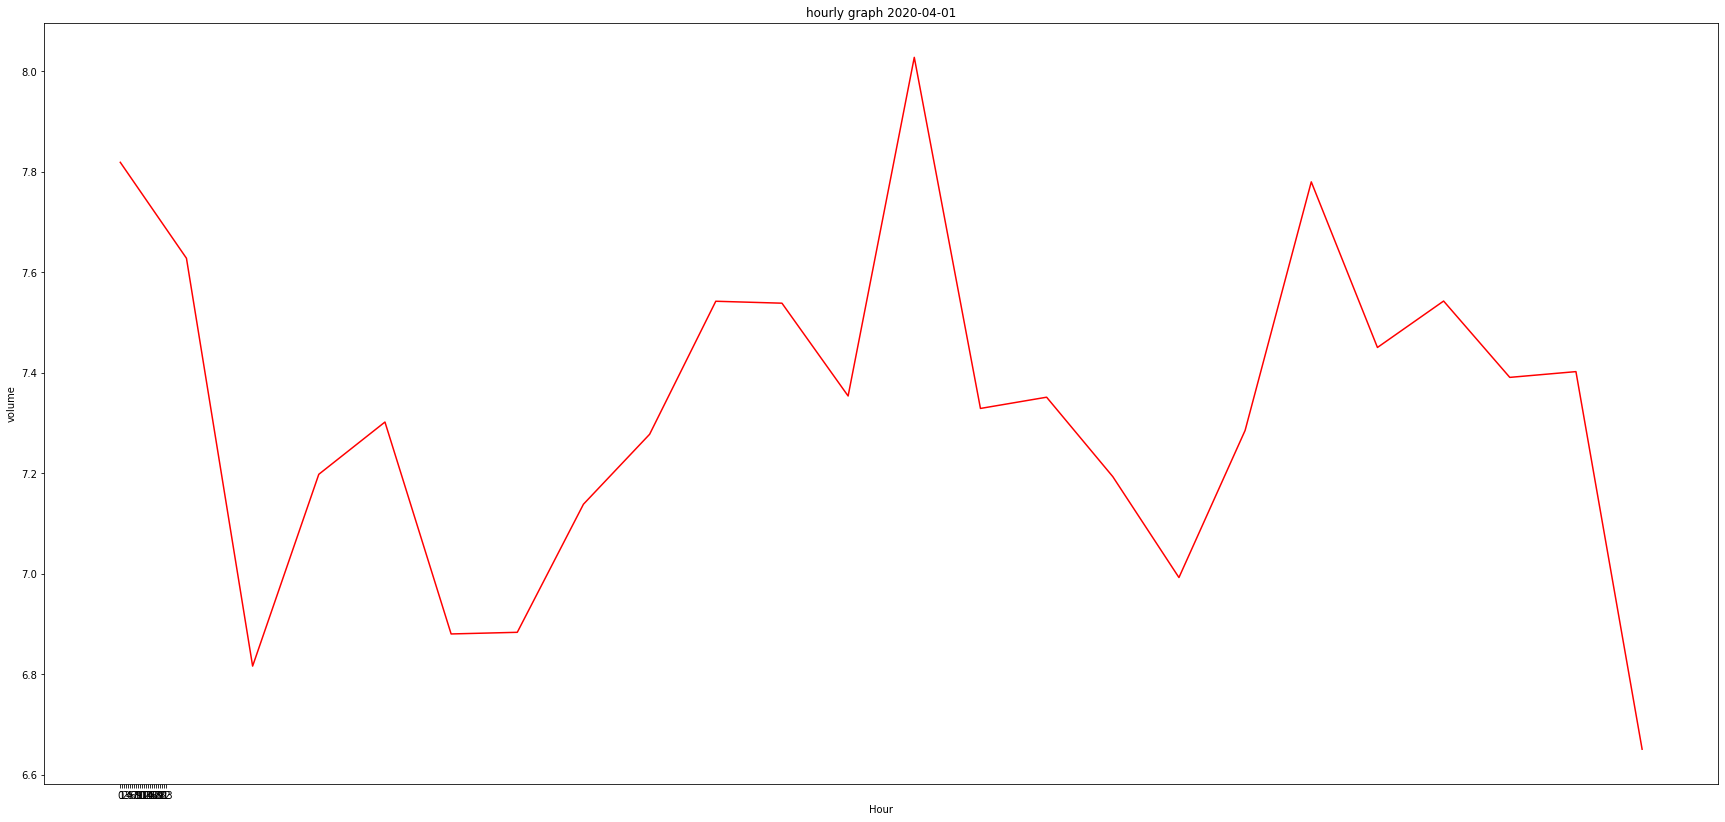

In [143]:

plt.title("Hourly graph "+dates[0])
plt.xlabel("Hour")
plt.ylabel("Volume")
plt.plot(di.region_mean_volume,"r")
plt.xticks(np.arange(24))
plt.show()